In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/drive/MyDrive/datasets/data_application_energy1111.csv')



# Exploratory Data Analysis

In [3]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11-01-2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,11-01-2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,11-01-2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,11-01-2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,11-01-2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
df.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [5]:
len(df[df.duplicated()])

0

In [6]:
df.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

# Given this is not a timeseries problem and we will focus on predicting the appliance consumption , we can ignore Date column

In [7]:
features=df.iloc[:,2:]

In [8]:
features.shape

(19734, 27)

In [9]:
features.head()

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.40,6.25,733.8,92.0,6.000000,51.500000,5.0,45.410390,45.410390
4,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.40,6.13,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


# Data Visualisation

<ipython-input-11-5edc29ceafbd>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log10(df['Appliances']),color='r')


<Axes: xlabel='Appliances', ylabel='Density'>

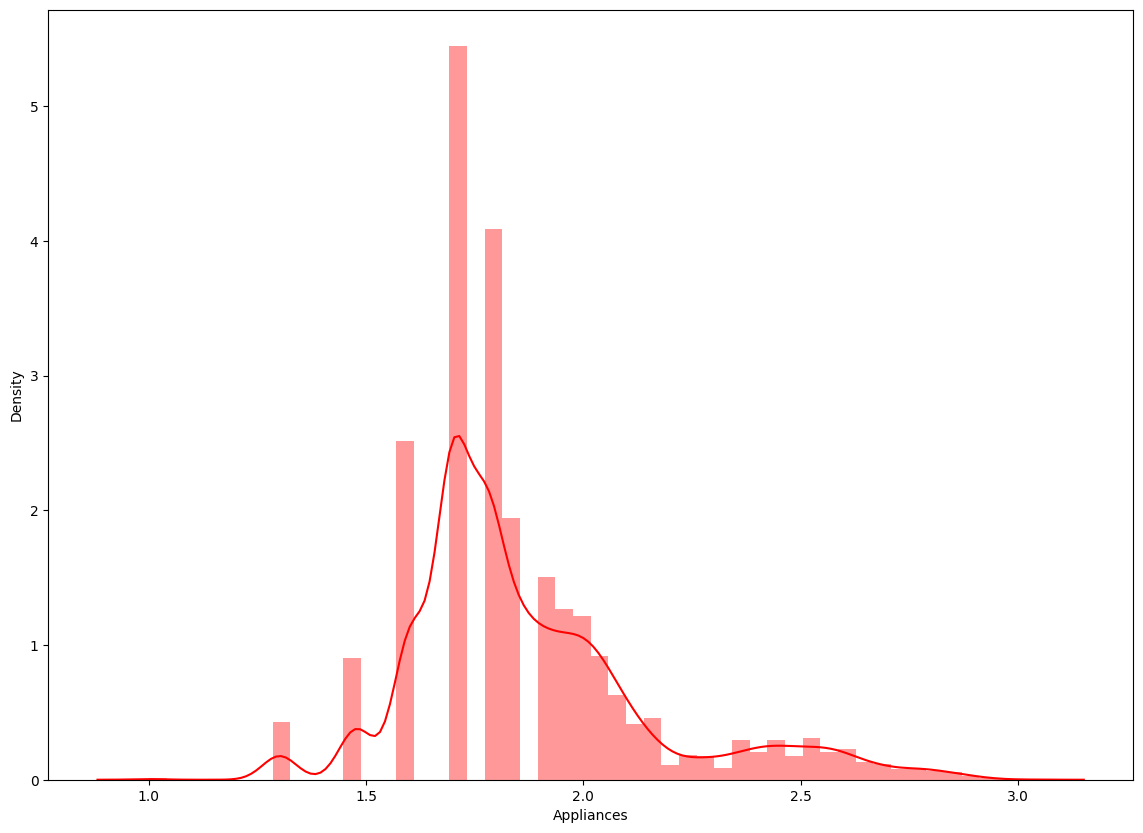

In [ ]:
plt.figure(figsize=(14,10))
sns.distplot(np.log10(df['Appliances']),color='r')

In [ ]:
numeric_features = df.describe().columns
numeric_features

Index(['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

<ipython-input-13-e24a311e6427>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(9, 6))


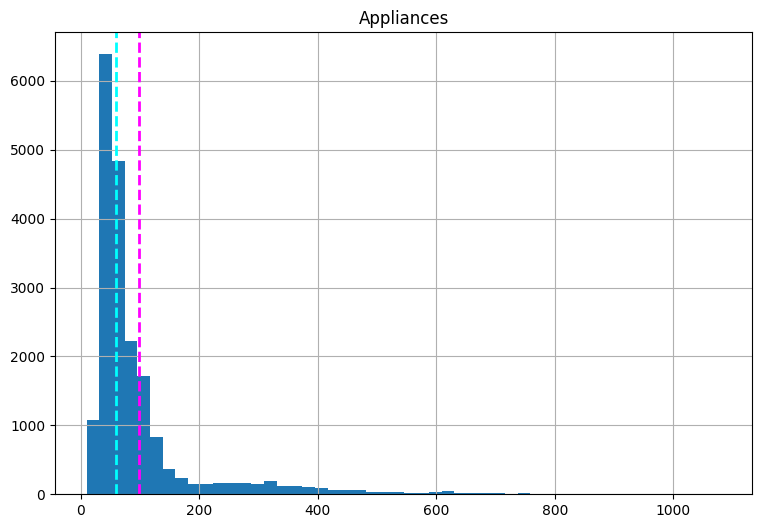

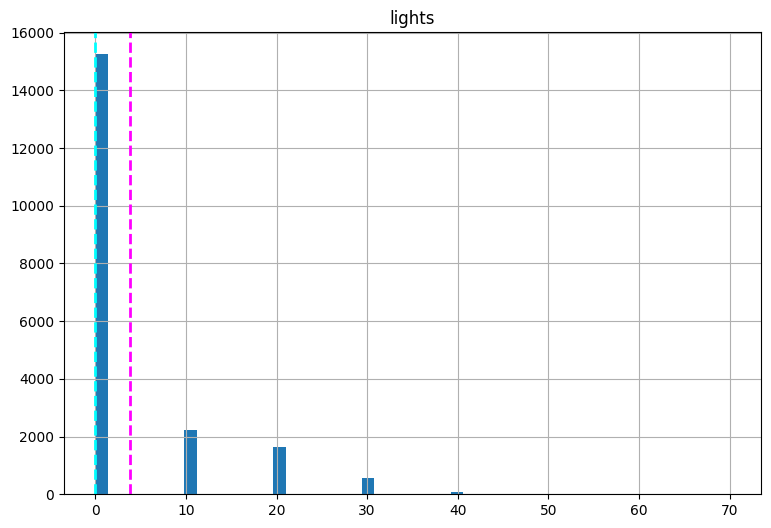

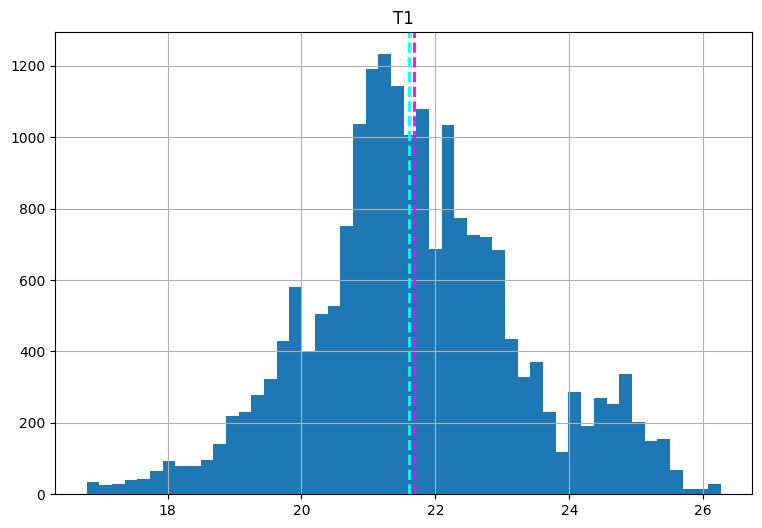

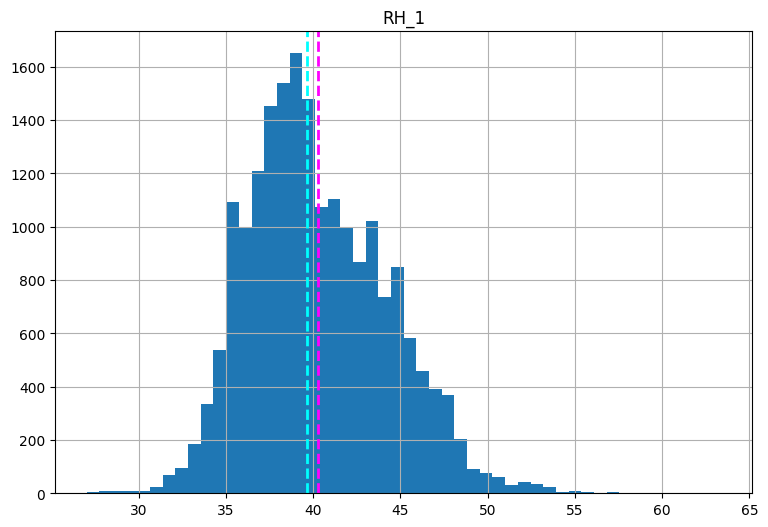

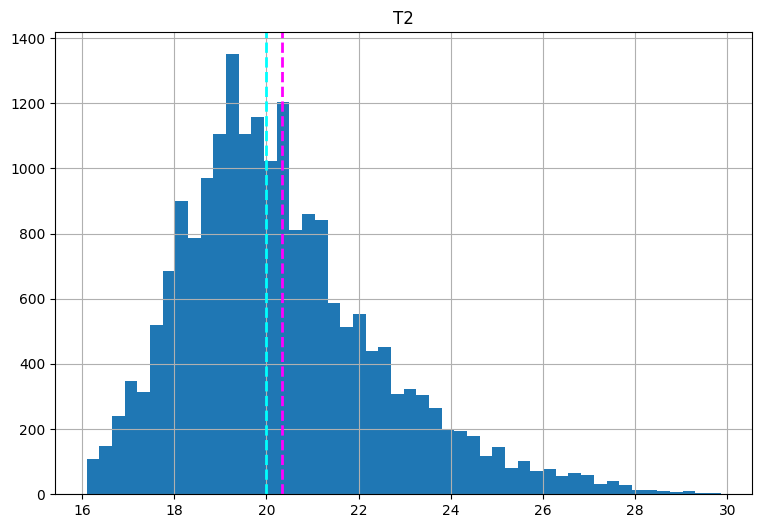

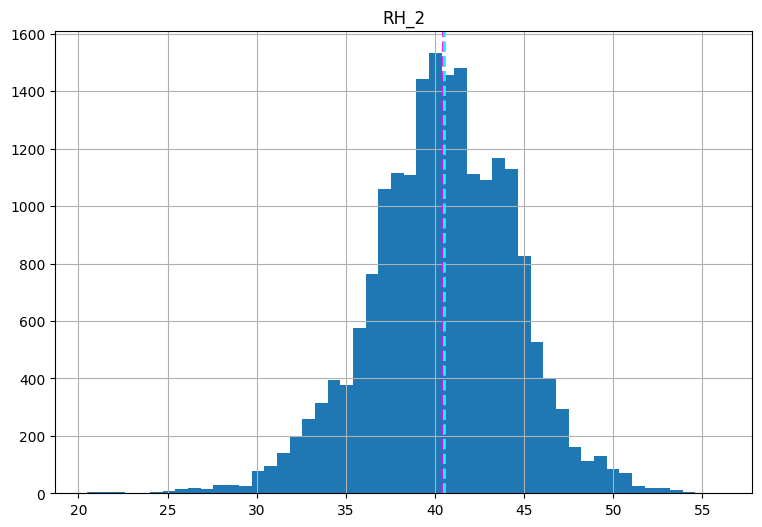

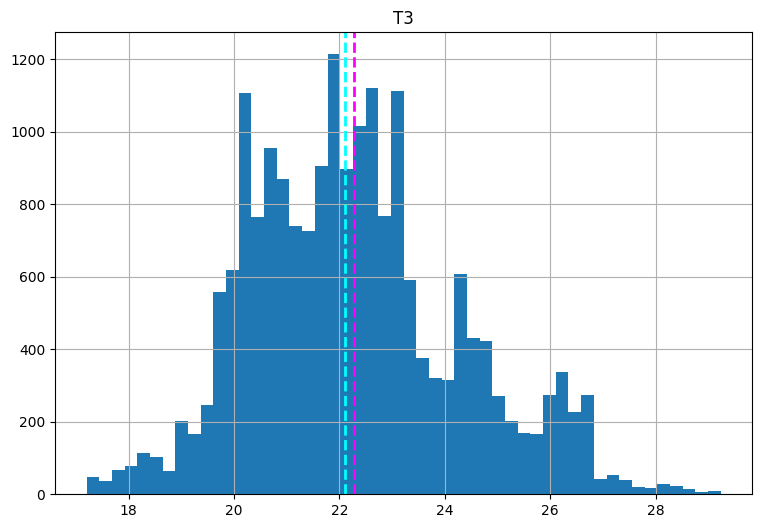

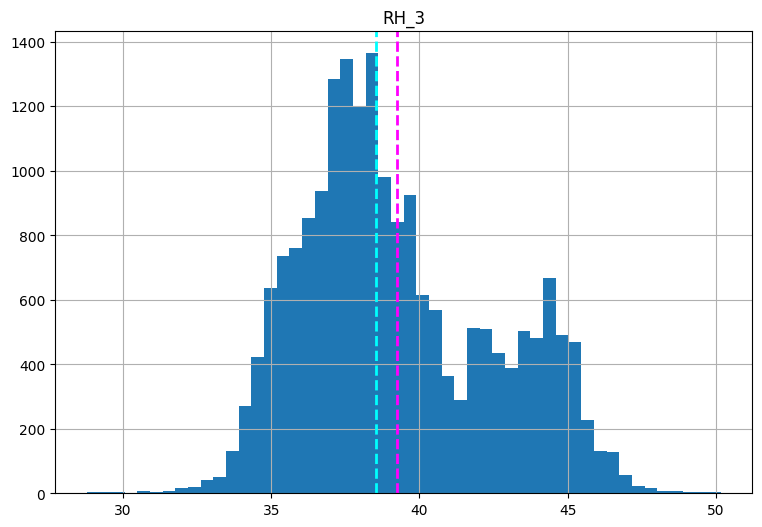

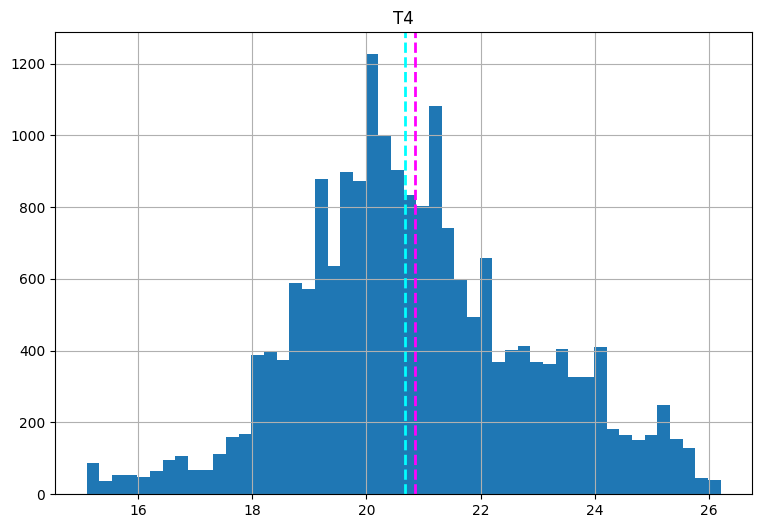

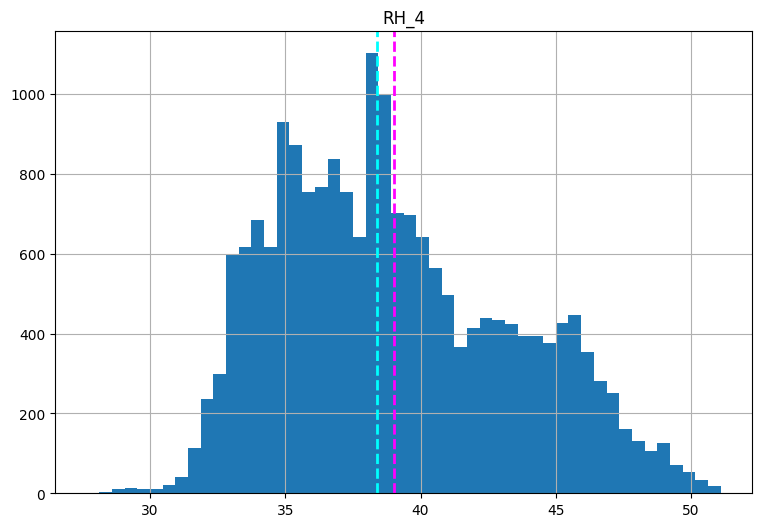

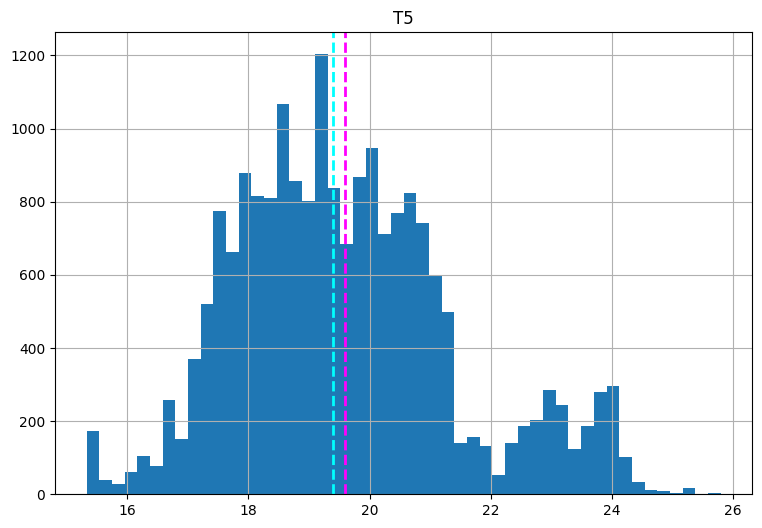

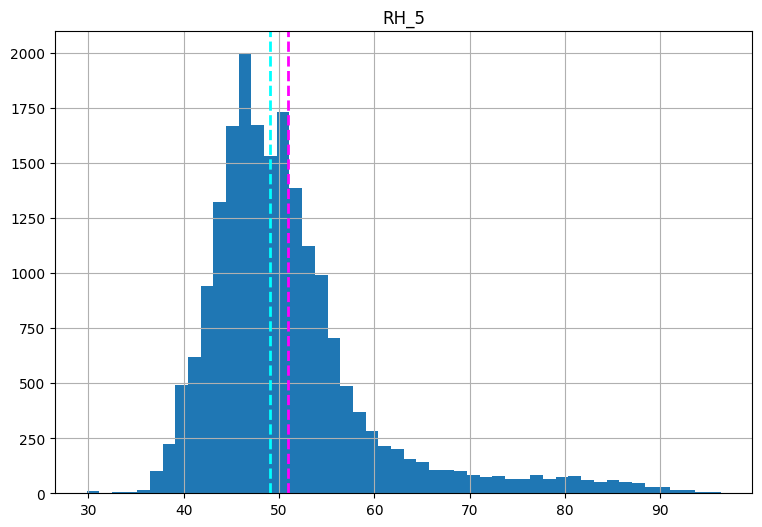

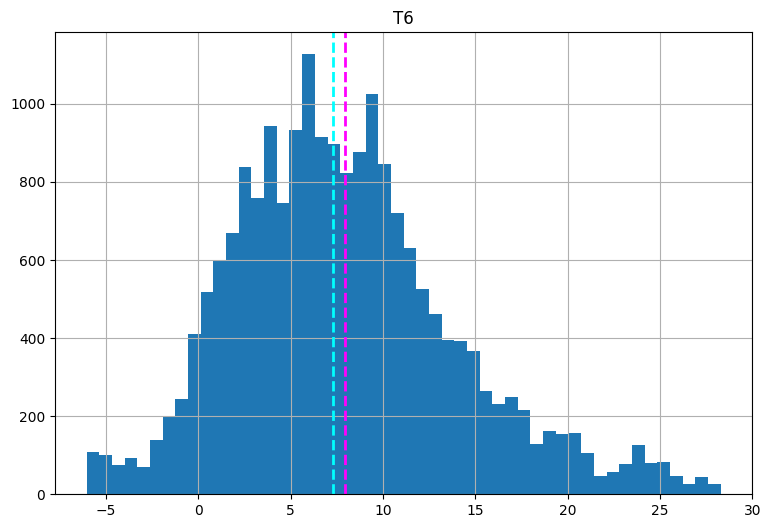

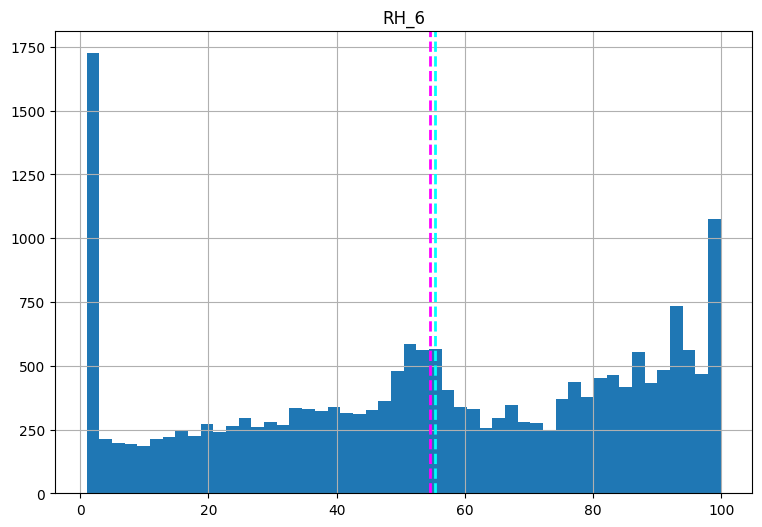

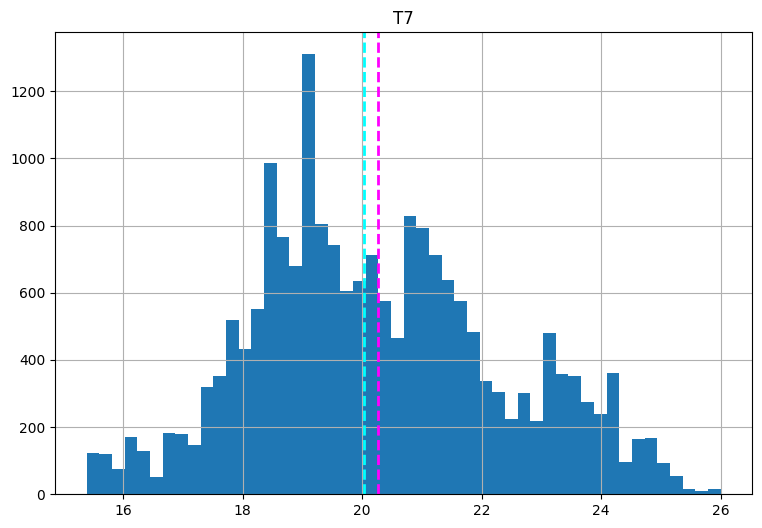

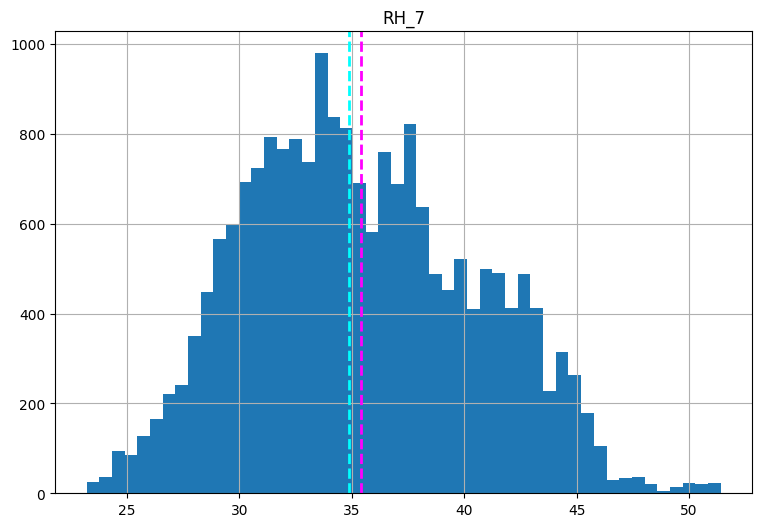

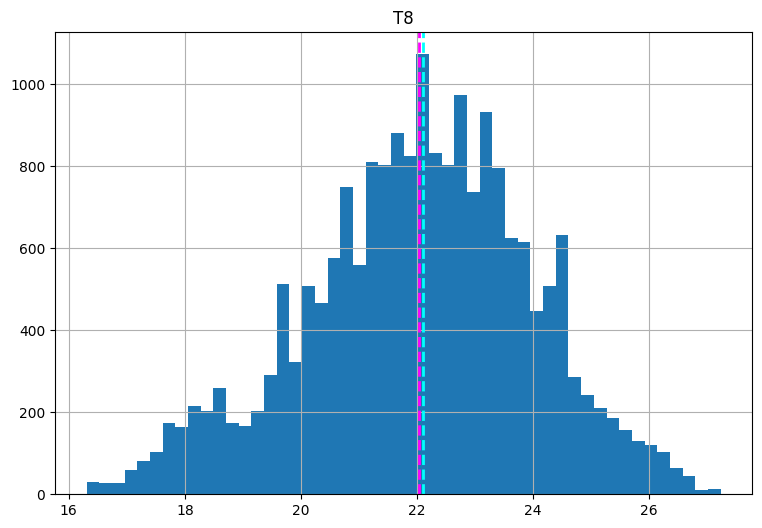

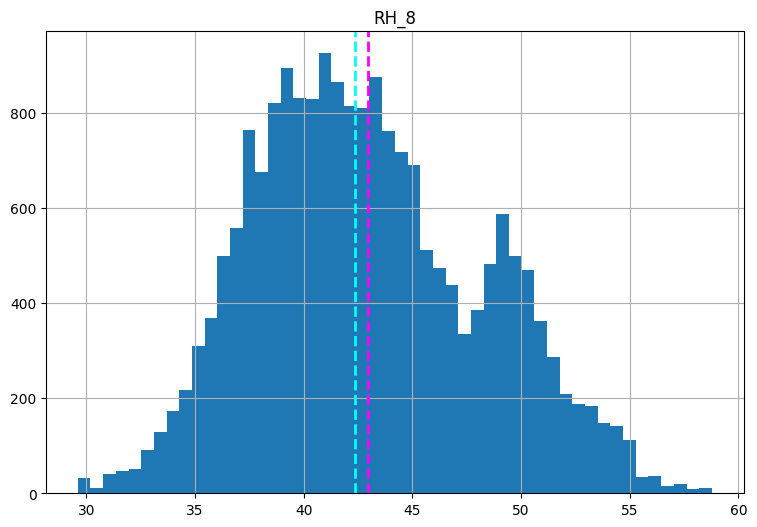

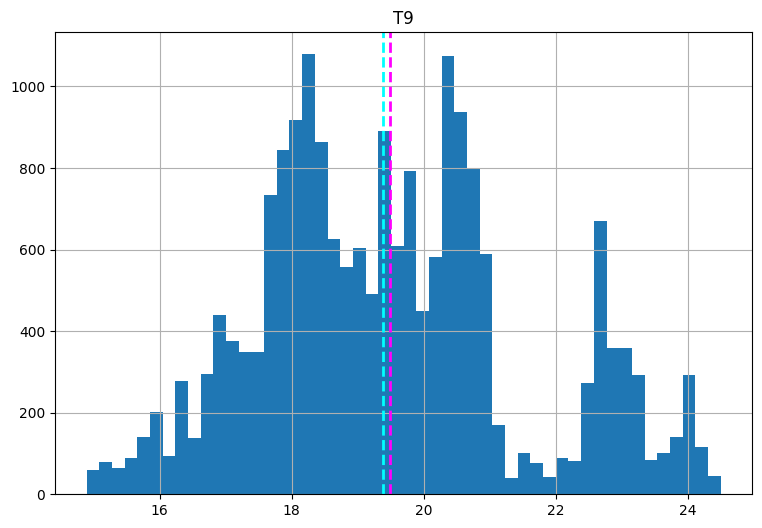

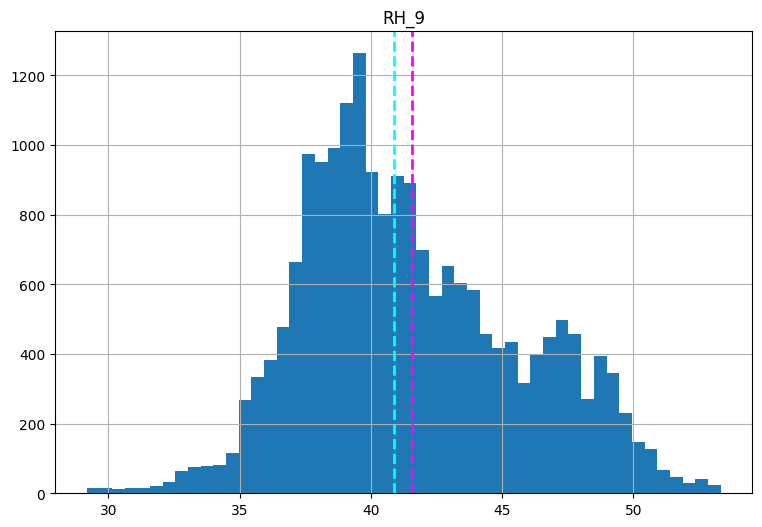

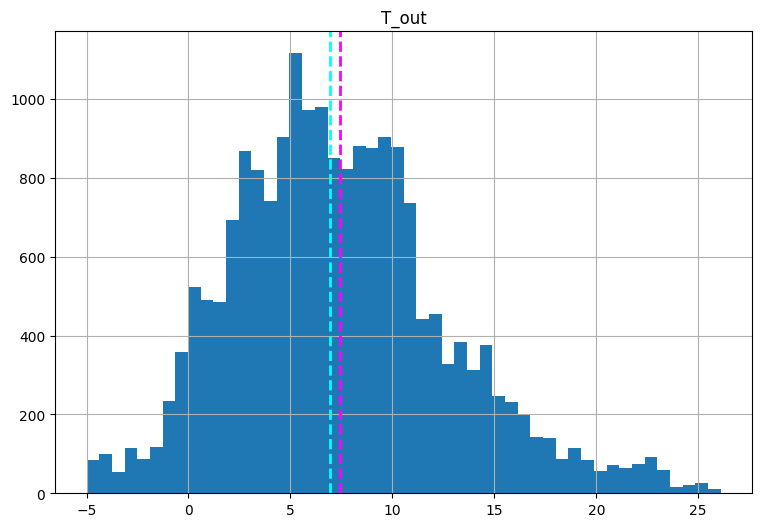

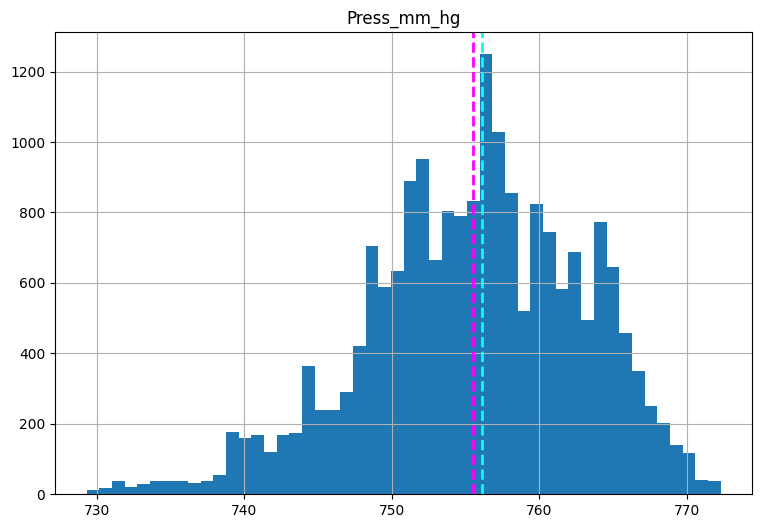

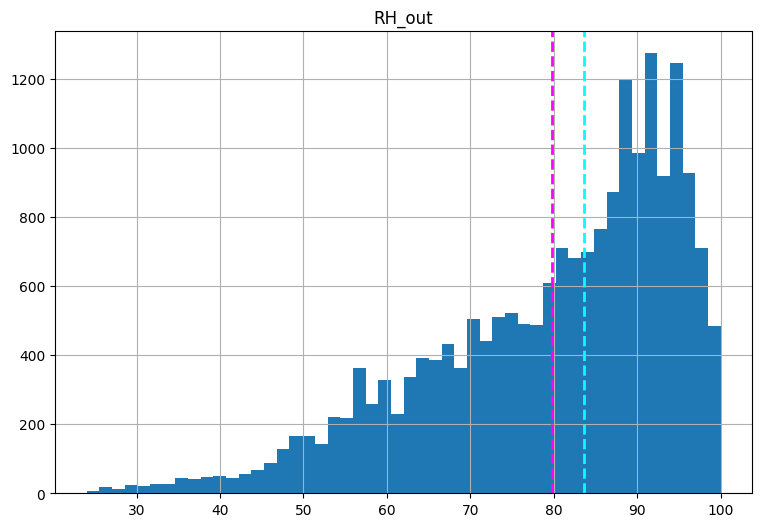

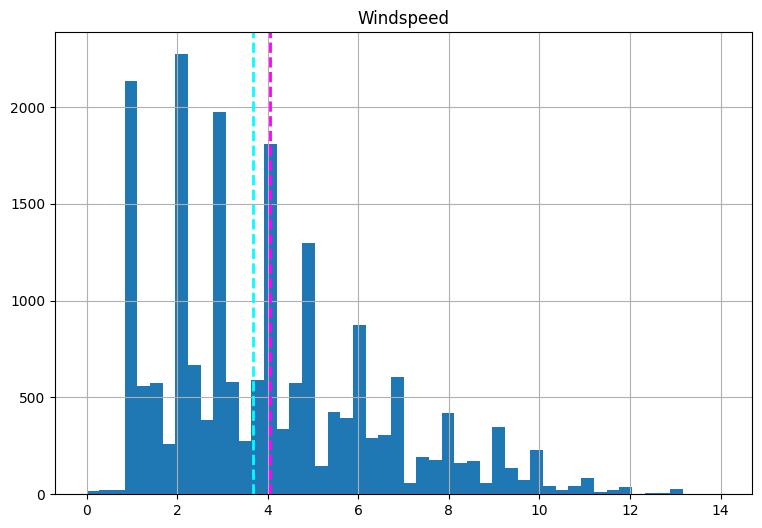

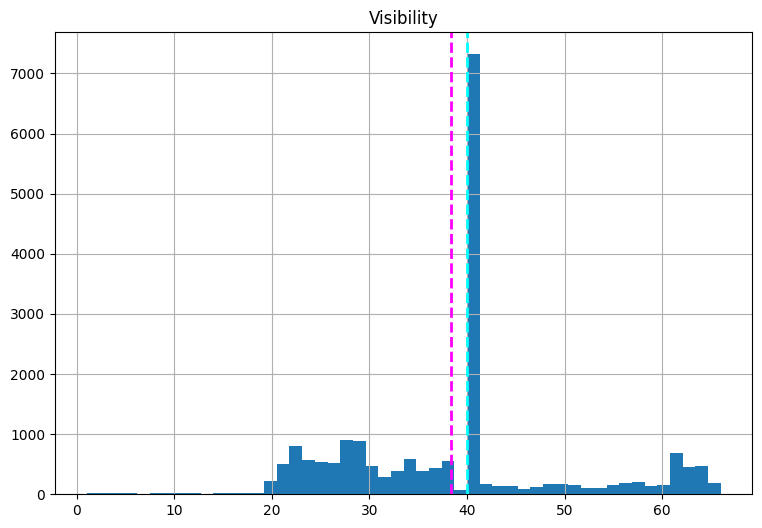

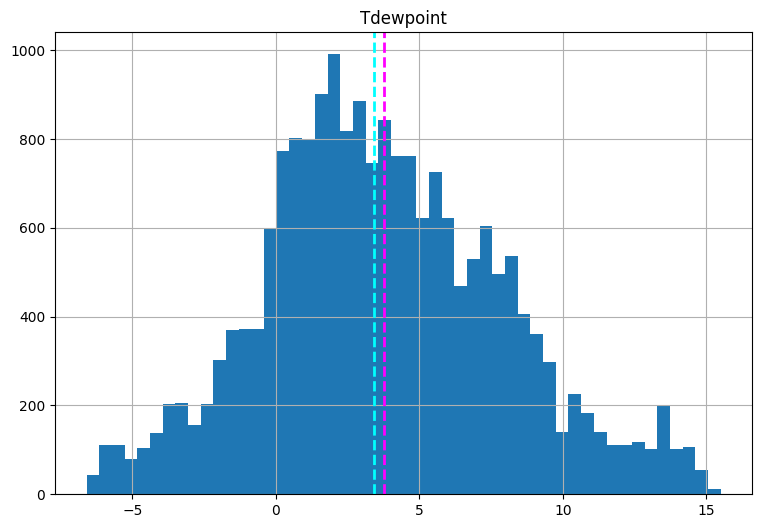

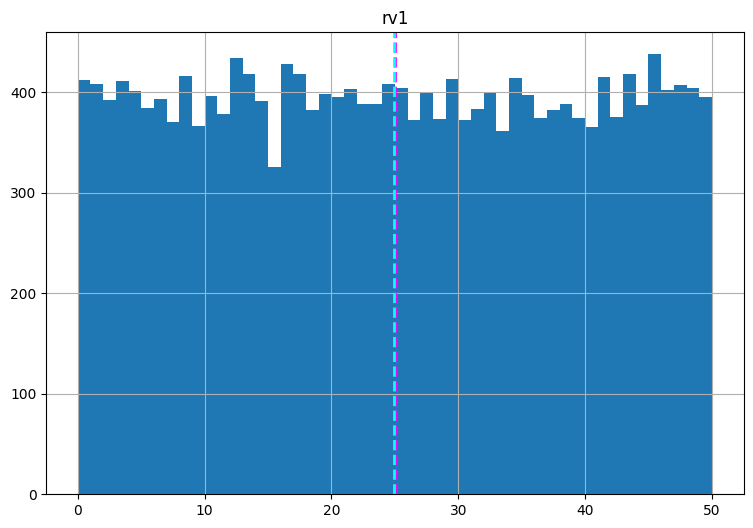

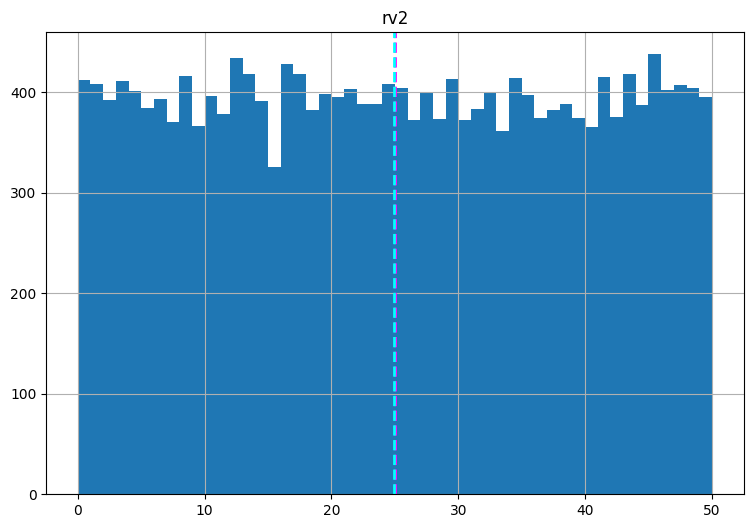

In [ ]:
#@title Default title text
# plot a bar plot for each categorical feature count (except car_ID)

for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

# Observations
Temperature - All the columns follow normal distribution except T9

Humidity - All columns follow normal distribution except RH_6 and RH_out , primarly because these sensors are outside the house


Appliance - This column is postively skewed , most the values are around mean

100 Wh . There are outliers in this column

Visibilty - This column is negatively skewed

Windspeed - This column is postively skewed

<ipython-input-14-d937d40dc28b>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(9, 6))


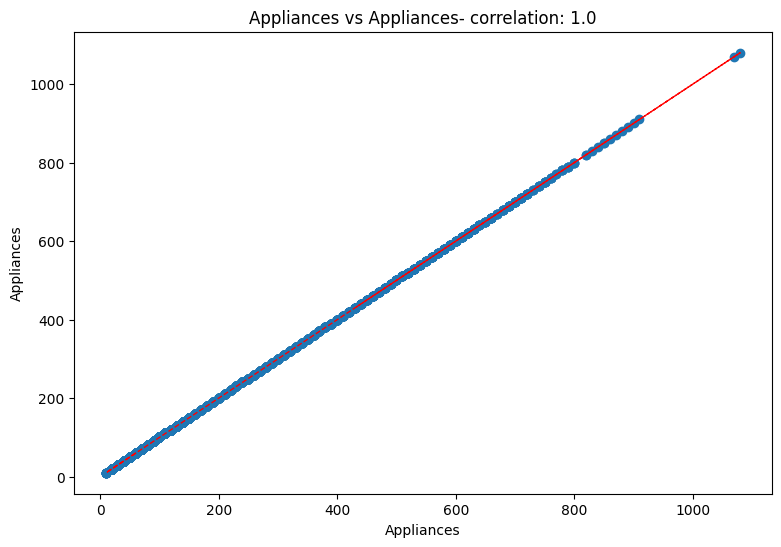

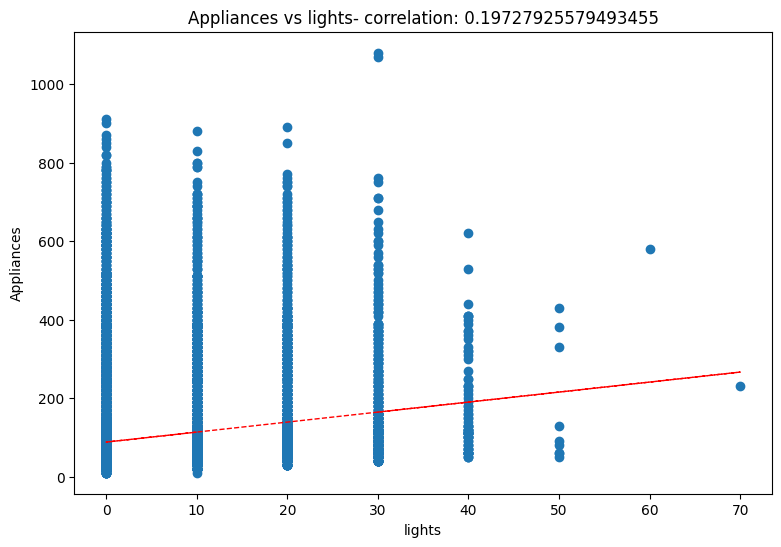

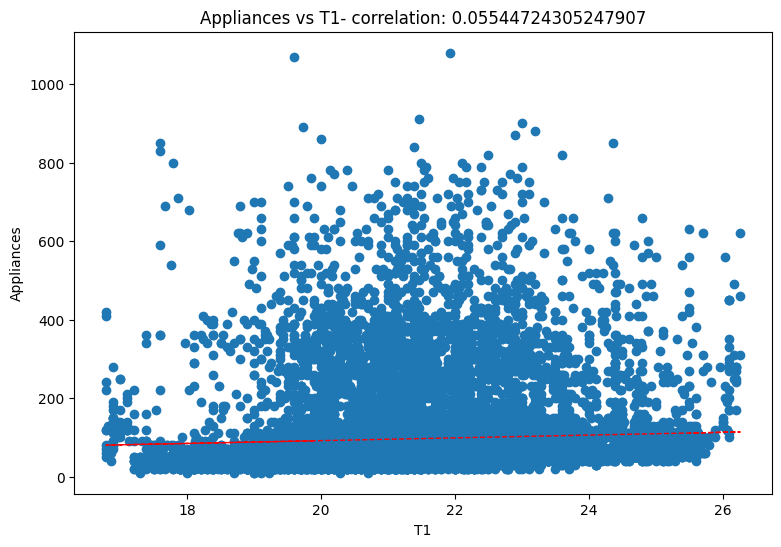

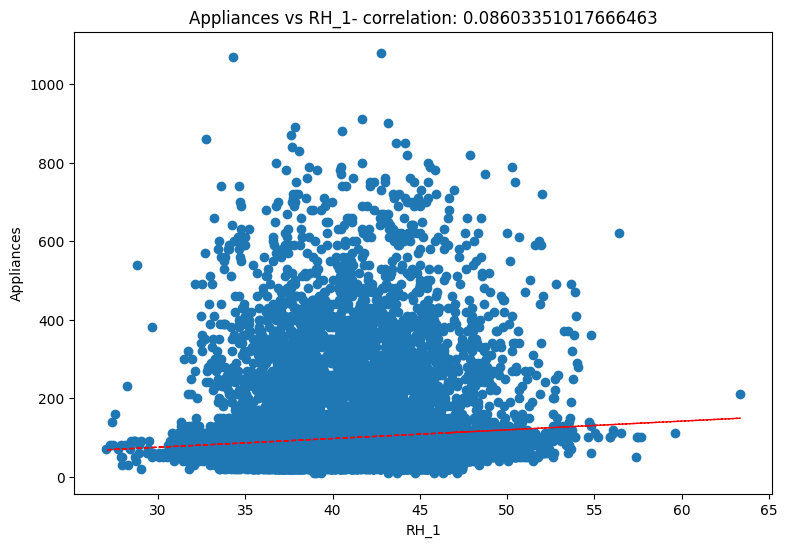

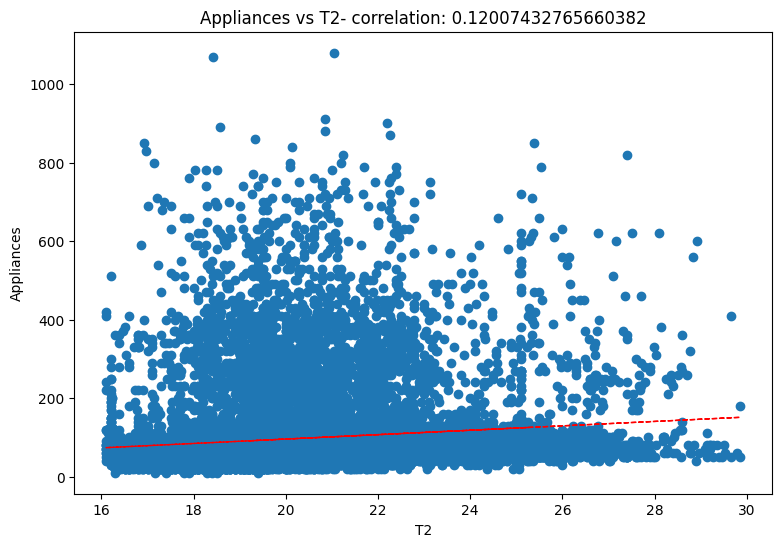

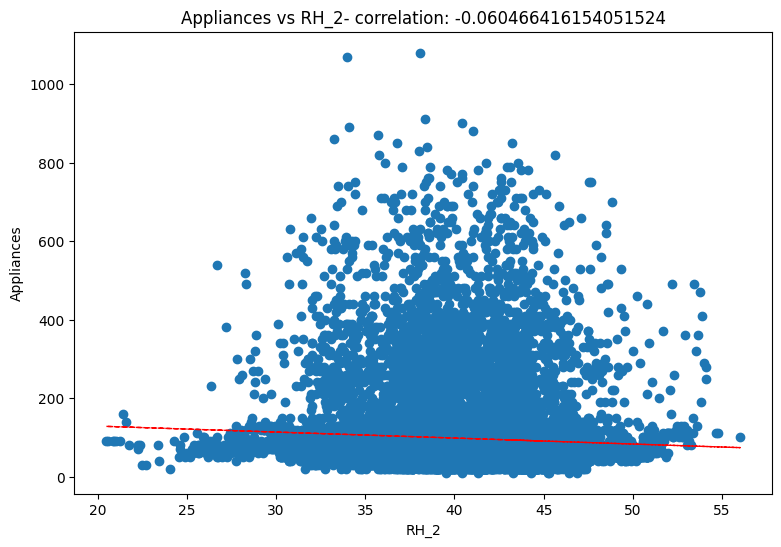

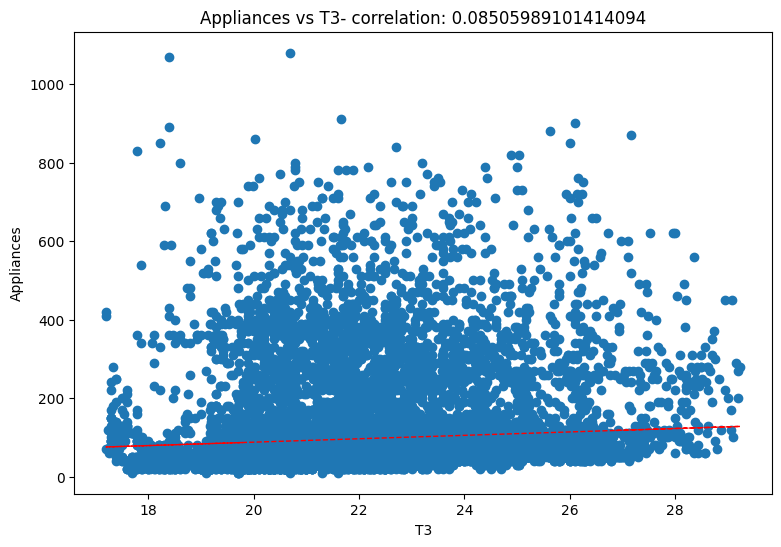

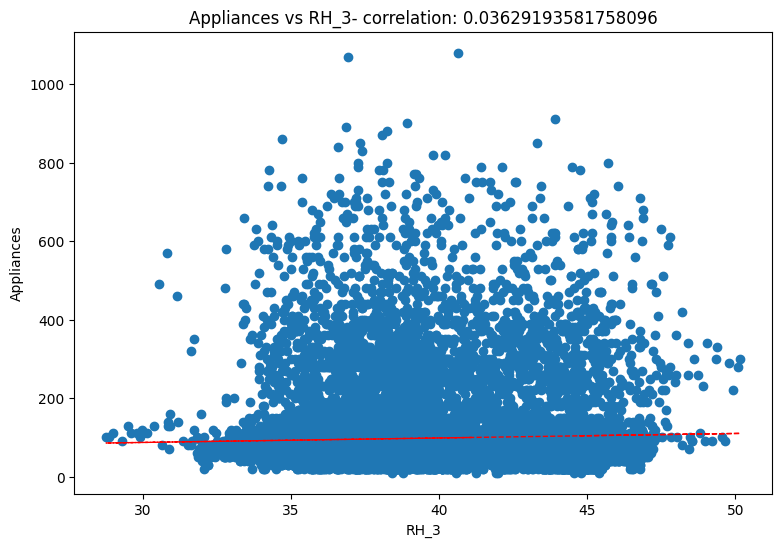

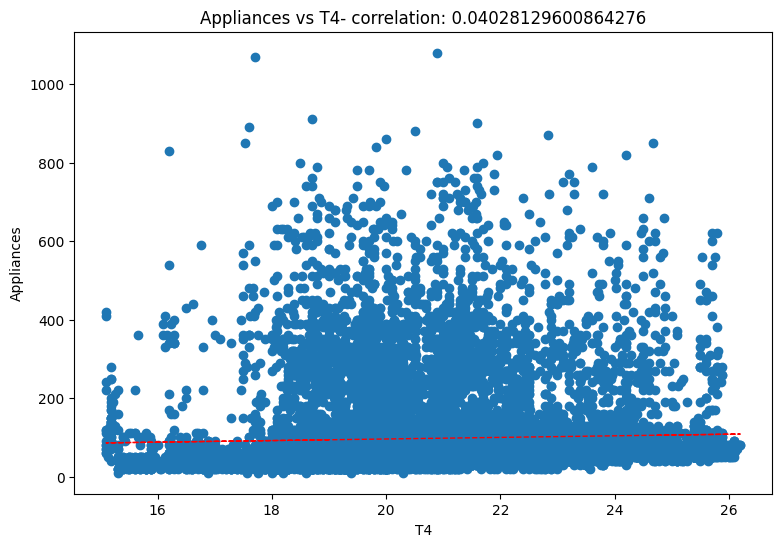

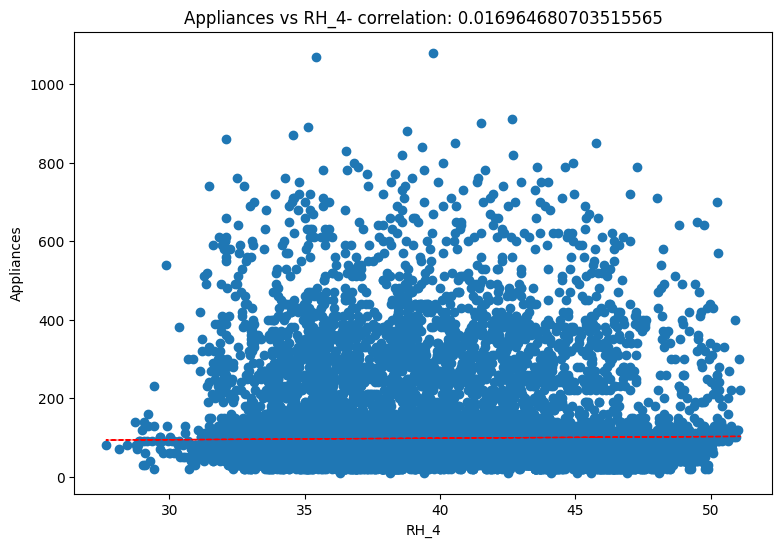

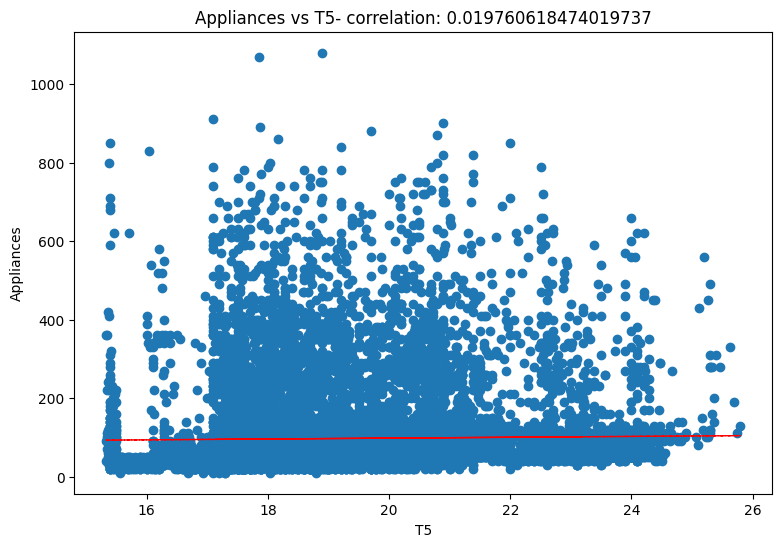

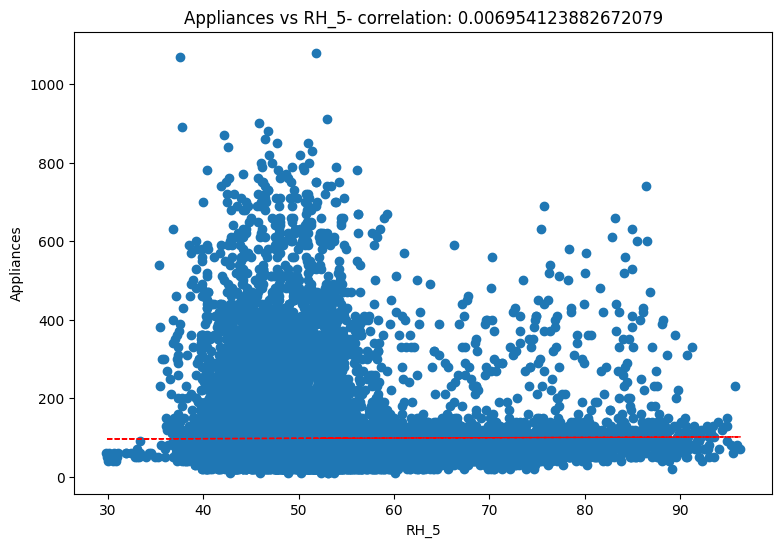

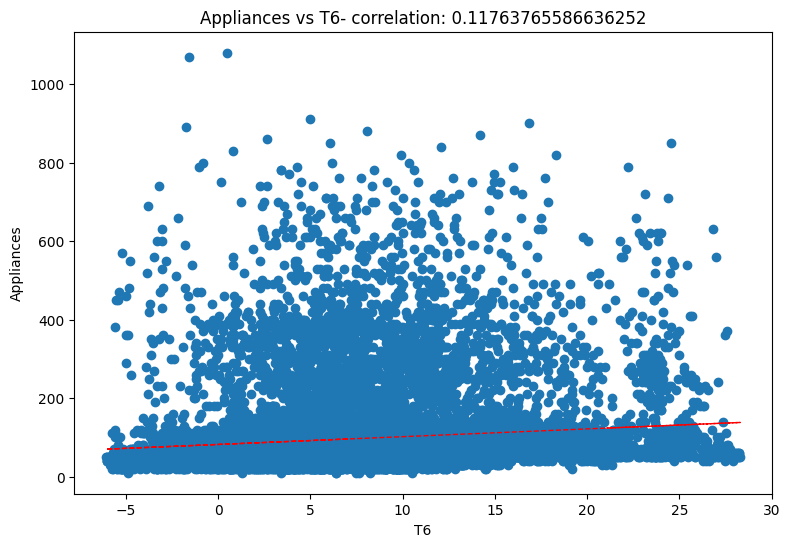

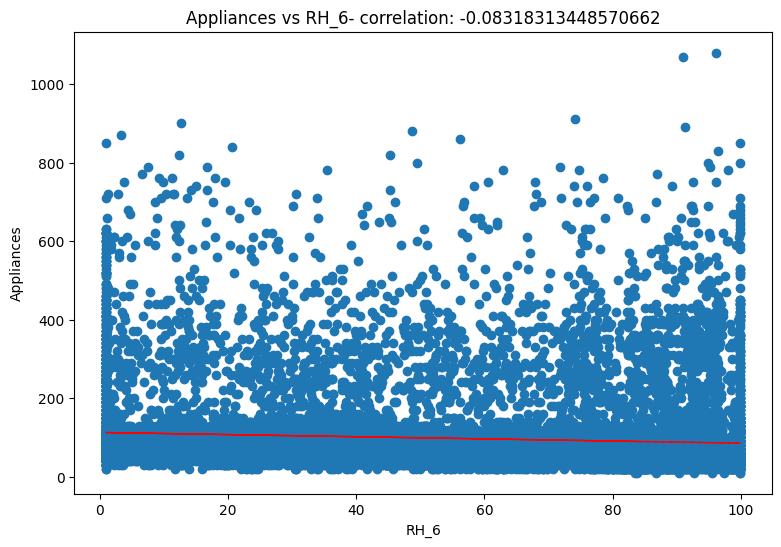

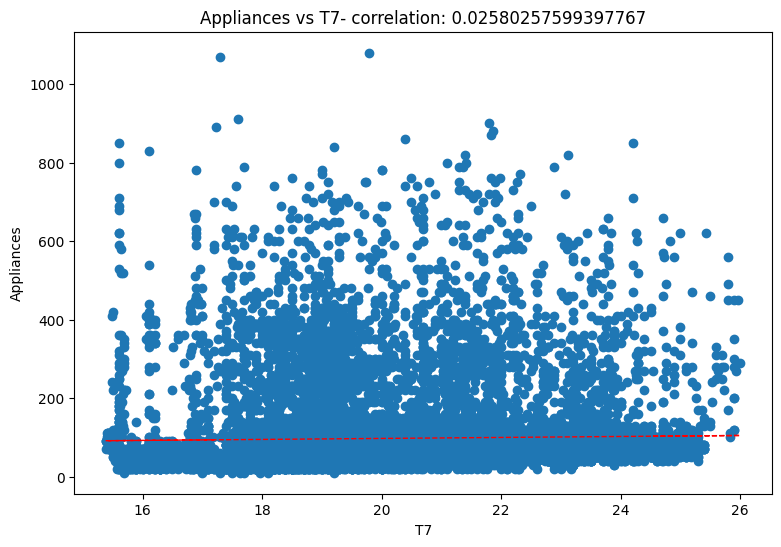

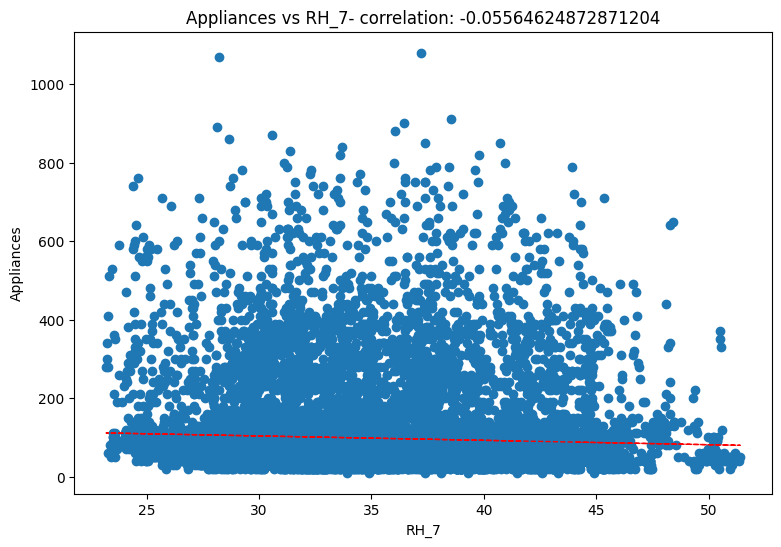

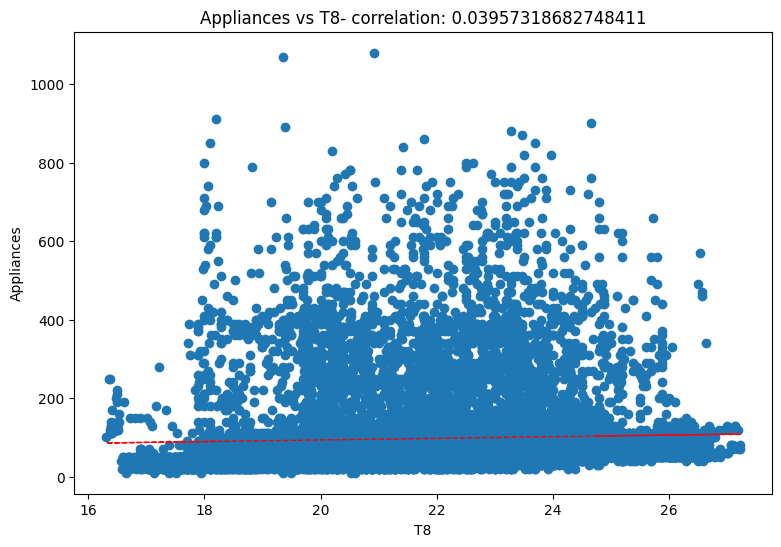

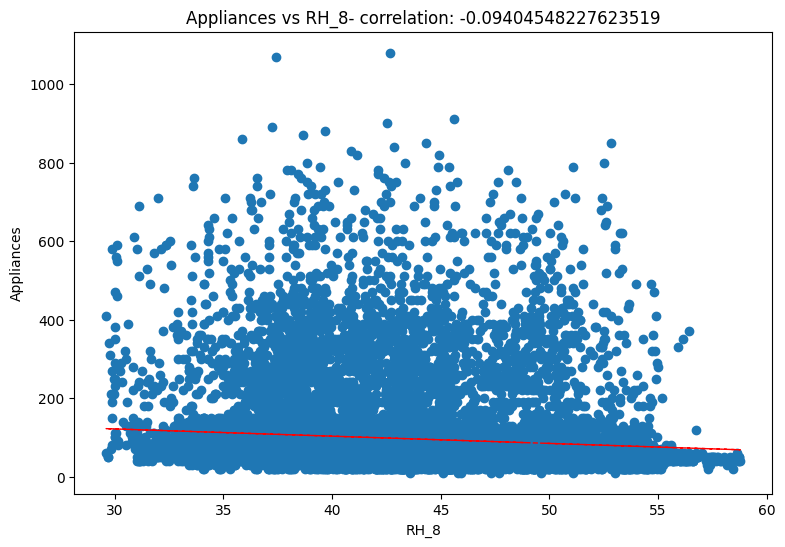

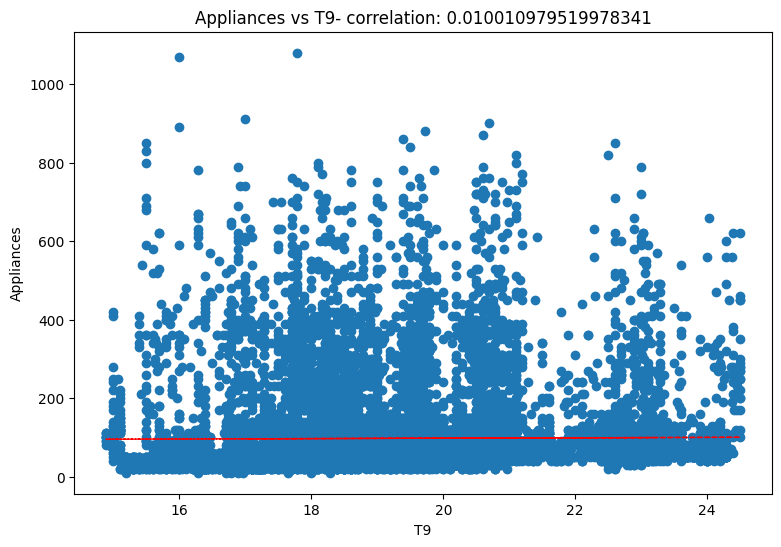

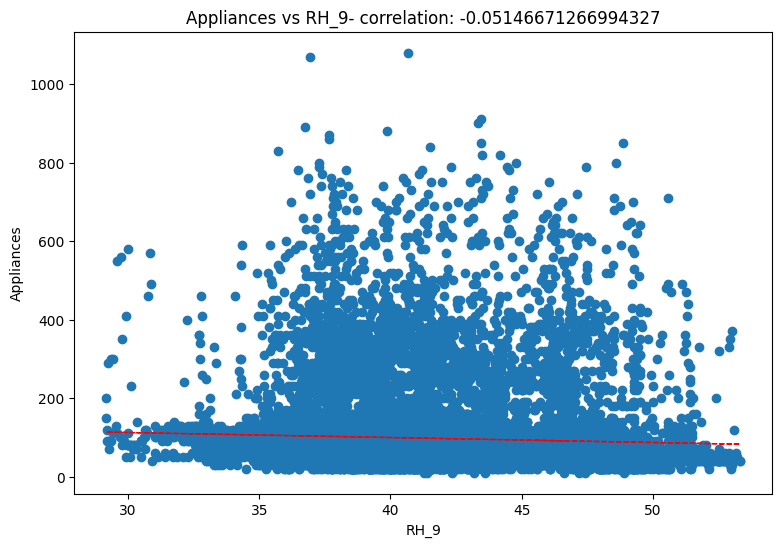

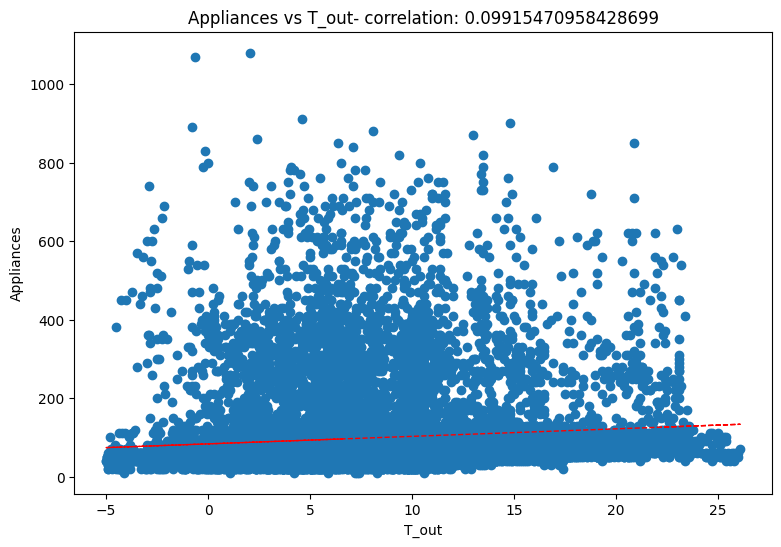

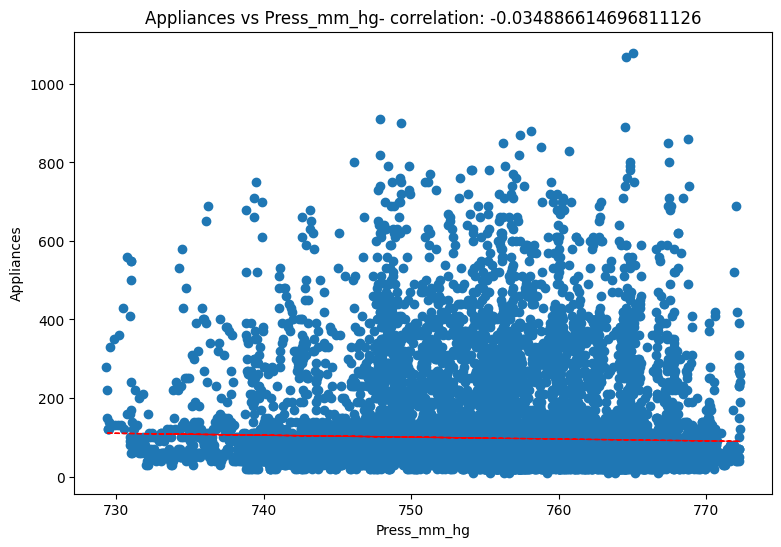

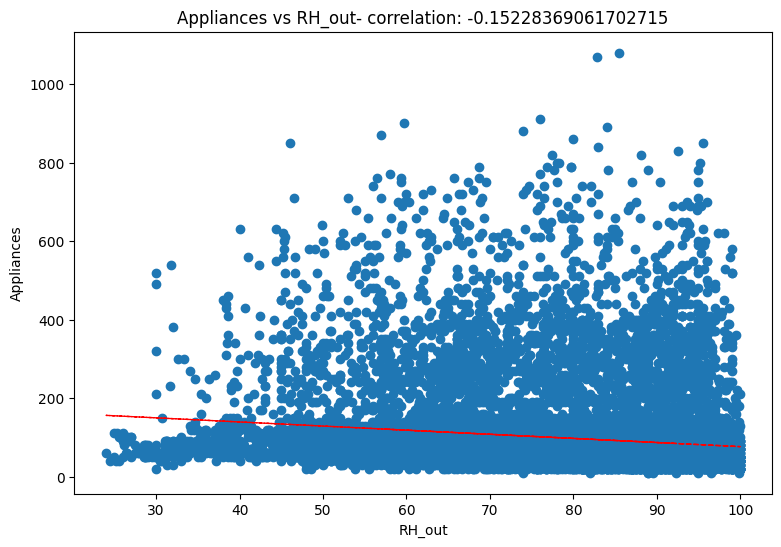

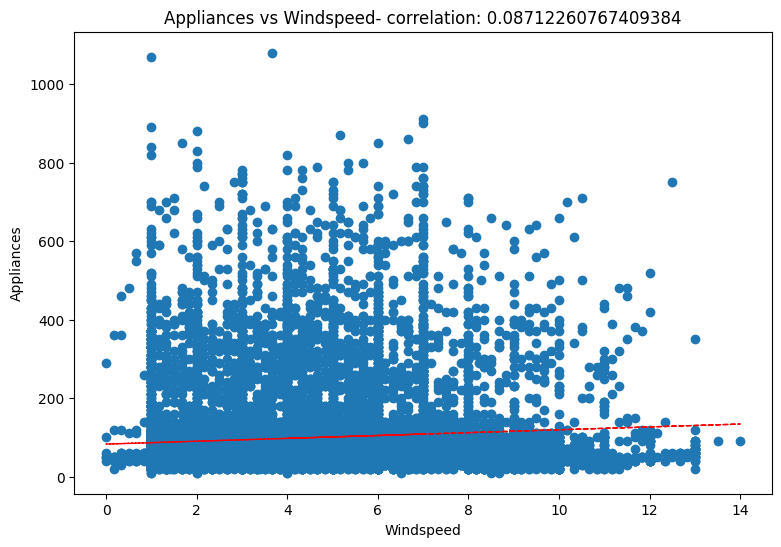

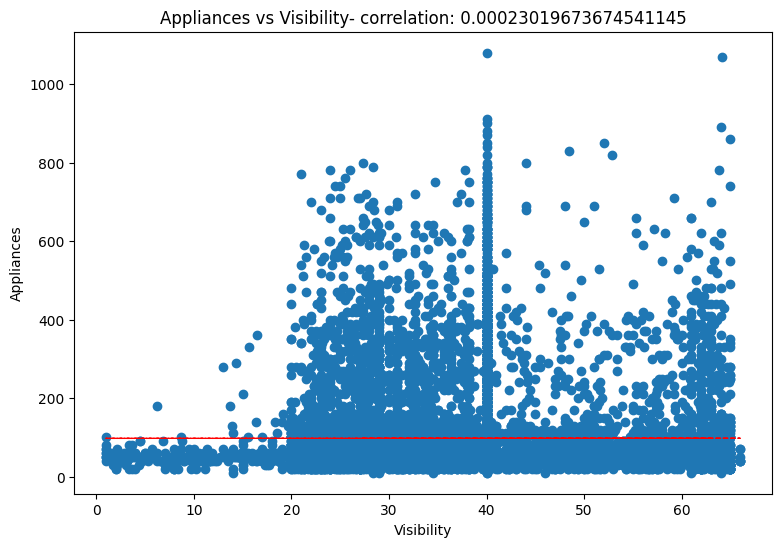

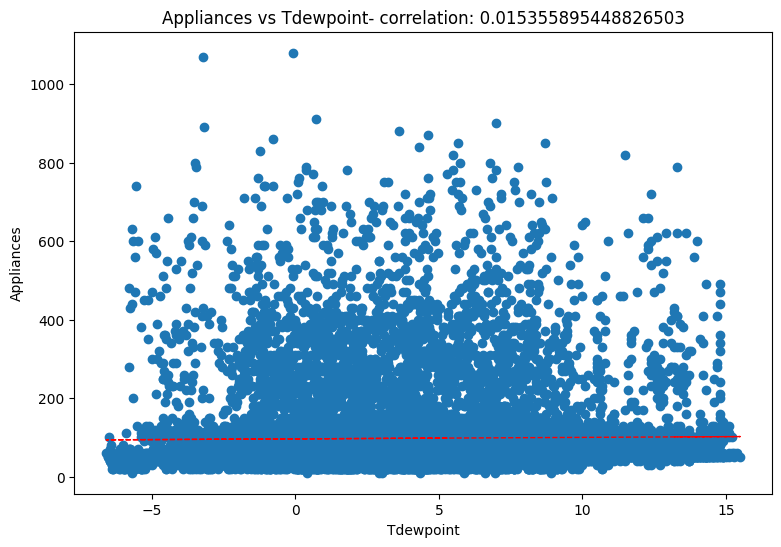

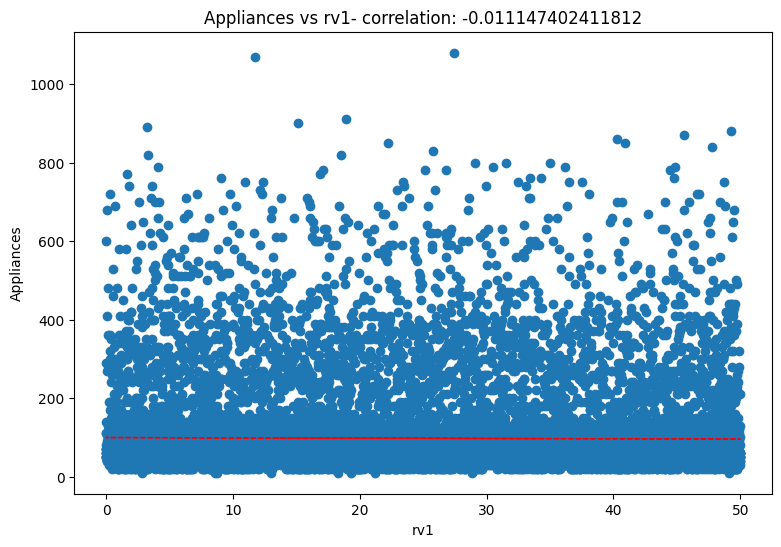

In [ ]:
for col in numeric_features[0:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    label = df['Appliances']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Appliances')
    ax.set_title('Appliances vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(df[col], df['Appliances'], 1)
    y_hat = np.poly1d(z)(df[col])

    plt.plot(df[col], y_hat, "r--", lw=1)

plt.show()

In [ ]:
corrr=df.corr()

<ipython-input-15-c3e5b82313f1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrr=df.corr()


<Axes: >

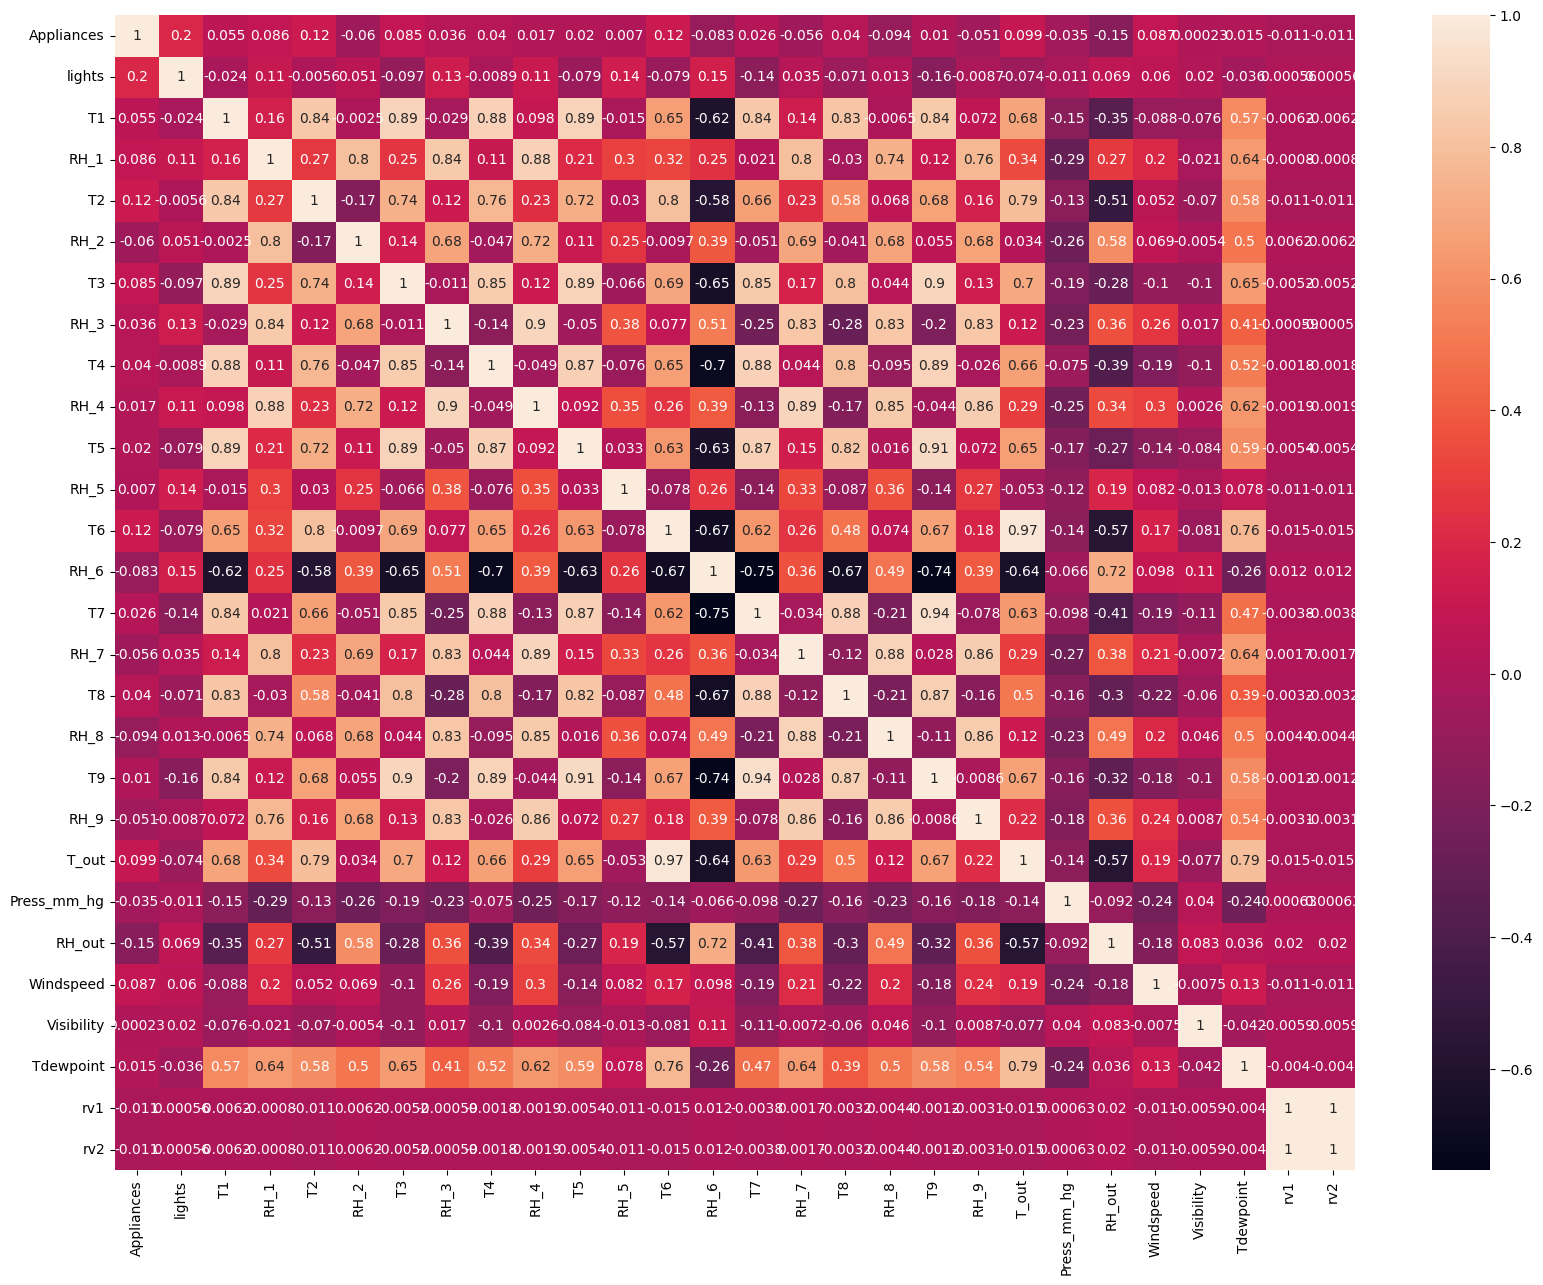

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(corrr,annot=True)


#Observations based on correlation
Positively Correlated Features:

Appliances and Lights: There is a positive correlation (0.197279) between the energy consumption of appliances and the use of lights. This suggests that when appliances are being used, there is also an increase in the use of lights.

T1 (Temperature in kitchen area) and T3 (Temperature in living room): There is a strong positive correlation (0.892406) between the temperature in the kitchen area and the temperature in the living room. This indicates that when the temperature in the kitchen area is high, the temperature in the living room tends to be high as well.

RH_1 (Humidity in kitchen area) and RH_3 (Humidity in living room): There is a strong positive correlation (0.844663) between the humidity in the kitchen area and the humidity in the living room. This suggests that when the humidity level is high in the kitchen area, it is also high in the living room.

Negatively Correlated Features:

T2 (Temperature in living room) and T6 (Temperature outside the building): There is a negative correlation (-0.580465) between the temperature in the living room and the temperature outside the building. This implies that when the temperature in the living room is high, the temperature outside the building tends to be low.

T3 (Temperature in living room) and T5 (Temperature in laundry room): There is a negative correlation (-0.647704) between the temperature in the living room and the temperature in the laundry room. This suggests that when the temperature in the living room is high, the temperature in the laundry room tends to be low.

T4 (Temperature in parents' room) and T9 (Temperature in teenager's room): There is a negative correlation (-0.703167) between the temperature in the parents' room and the temperature in the teenager's room. This indicates that when the temperature in the parents' room is high, the temperature in the teenager's room tends to be low.

In [10]:
def correlation(feature,threshold):
  col_corr=set()
  corr_matrix=feature.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])>threshold:
        colname=corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [11]:
corr_features=correlation(features,0.90)


In [12]:
corr_features

{'T9', 'T_out', 'rv2'}

In [13]:
#drop the features when the correlation is more than .90 percent
features.drop(corr_features,inplace=True,axis=1)

In [14]:
target=df.iloc[:,1]

In [ ]:

target.head()

0    60
1    60
2    50
3    50
4    60
Name: Appliances, dtype: int64

# Data Preprocessing

In [ ]:

from sklearn.model_selection import train_test_split

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.25,random_state=55)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
xtrain=scaler.fit_transform(xtrain)

In [ ]:
xtest=scaler.transform(xtest)

In [ ]:
features.columns

Index(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5',
       'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'RH_9', 'Press_mm_hg',
       'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt


<ipython-input-31-3149b5fd36ea>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)
<ipython-input-31-3149b5fd36ea>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,2)


<Axes: >

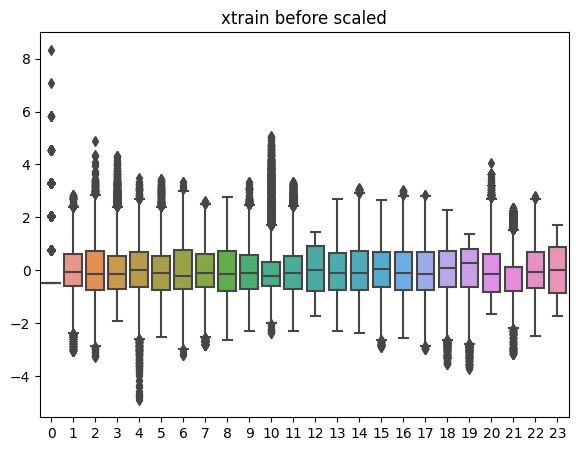

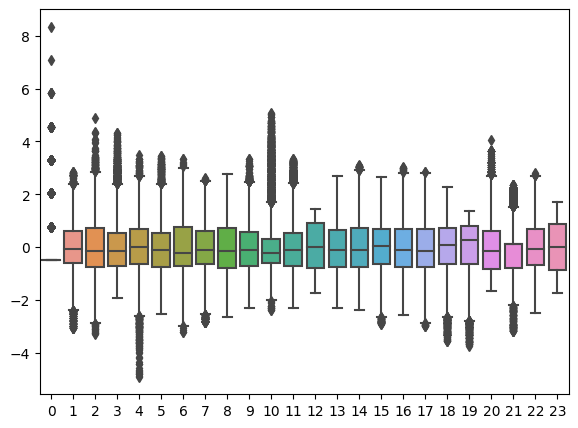

In [ ]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=xtrain)
plt.title('xtrain before scaled')
plt.subplots(figsize=(15,5))
plt.subplot(1,2,2)
sns.boxplot(data=xtrain)

# ***Model Selection***

# Model Implementation
We will be looking at following Algorithms

Improved Linear regression models

1.Ridge regression

2.Lasso regression

3.Linear Regression

4.Random Forest Regressor

5.Support vector regressor

6.Decision Tree Regressor



In [ ]:
from math import sqrt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso,LinearRegression,Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
def evaluate_model(xtrain, ytrain, xtest, ytest, models):
    report = {}
    for name, model in models.items():
        # Train the model
        model.fit(xtrain, ytrain)

        # Predict on testing data
        y_train_pred = model.predict(xtrain)
        y_test_pred = model.predict(xtest)

        # Calculate evaluation metrics

        train_rmse = sqrt(mean_squared_error(ytrain, y_train_pred))
        train_r2 = r2_score(ytrain, y_train_pred)
        test_rmse = sqrt(mean_squared_error(ytest, y_test_pred))
        test_r2 = r2_score(ytest, y_test_pred)

        # Store the evaluation metrics in the report
        report[name] = { 'Train RMSE': train_rmse, 'Train R2': train_r2,
                         'Test RMSE': test_rmse, 'Test R2': test_r2}

    return report

# Define the regression models
models = {
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'SVR': SVR(),
    'Lasso': Lasso(),
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge()
}

# Call the evaluate_model function
report = evaluate_model(xtrain, ytrain, xtest, ytest, models)

# Print the evaluation report
for name, metrics in report.items():
    print(name)

    print('Train RMSE:', metrics['Train RMSE'])
    print('Train R2:', metrics['Train R2'])

    print('Test RMSE:', metrics['Test RMSE'])
    print('Test R2:', metrics['Test R2'])
    print('---')


Random Forest
Train RMSE: 26.81018168330629
Train R2: 0.9311461865651851
Test RMSE: 70.89281392406534
Test R2: 0.5314031314390364
---
Decision Tree
Train RMSE: 0.0
Train R2: 1.0
Test RMSE: 96.92411751541027
Test R2: 0.12409165691427015
---
SVR
Train RMSE: 101.00086074719975
Train R2: 0.022810854582640094
Test RMSE: 102.92471689073349
Test R2: 0.012278939042658865
---
Lasso
Train RMSE: 94.26507110414683
Train R2: 0.14880300209034059
Test RMSE: 96.44261931040626
Test R2: 0.13277268962812705
---
LinearRegression
Train RMSE: 93.32147459897264
Train R2: 0.16575873216501102
Test RMSE: 96.04107998548675
Test R2: 0.13997906687452288
---
Ridge
Train RMSE: 93.321491477778
Train R2: 0.1657584303910128
Test RMSE: 96.037991683498
Test R2: 0.14003437574142075
---


In [ ]:
import pandas as pd

# Define the evaluation report as a DataFrame
report_df = pd.DataFrame(report).T

# Print the evaluation report
report_df



,Train RMSE,Train R2,Test RMSE,Test R2
Random Forest,26.810182,0.931146,70.892814,0.531403
Decision Tree,0.000000,1.000000,96.924118,0.124092
SVR,101.000861,0.022811,102.924717,0.012279
Lasso,94.265071,0.148803,96.442619,0.132773
LinearRegression,93.321475,0.165759,96.041080,0.139979
Ridge,93.321491,0.165758,96.037992,0.140034


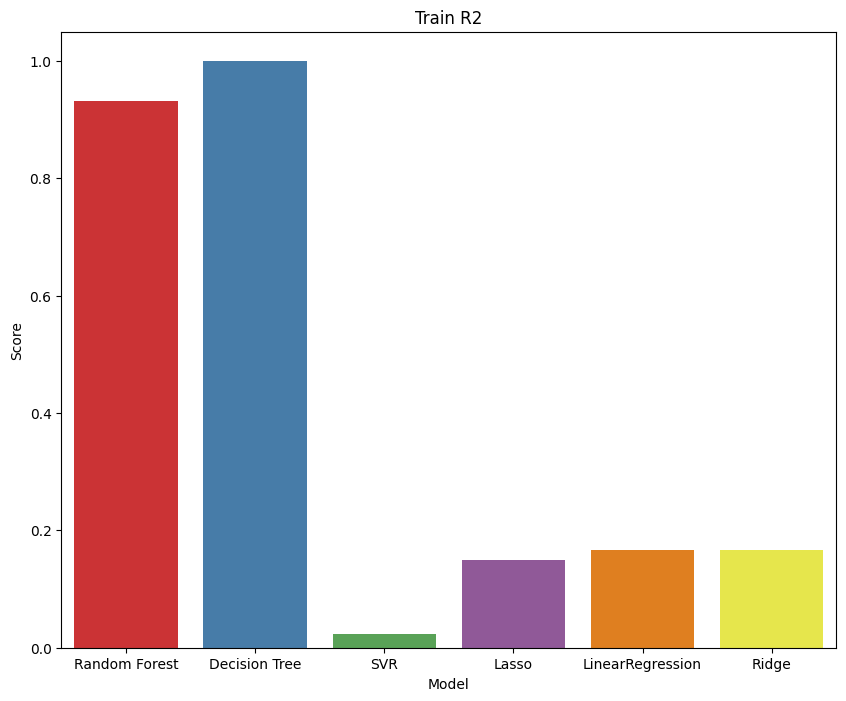

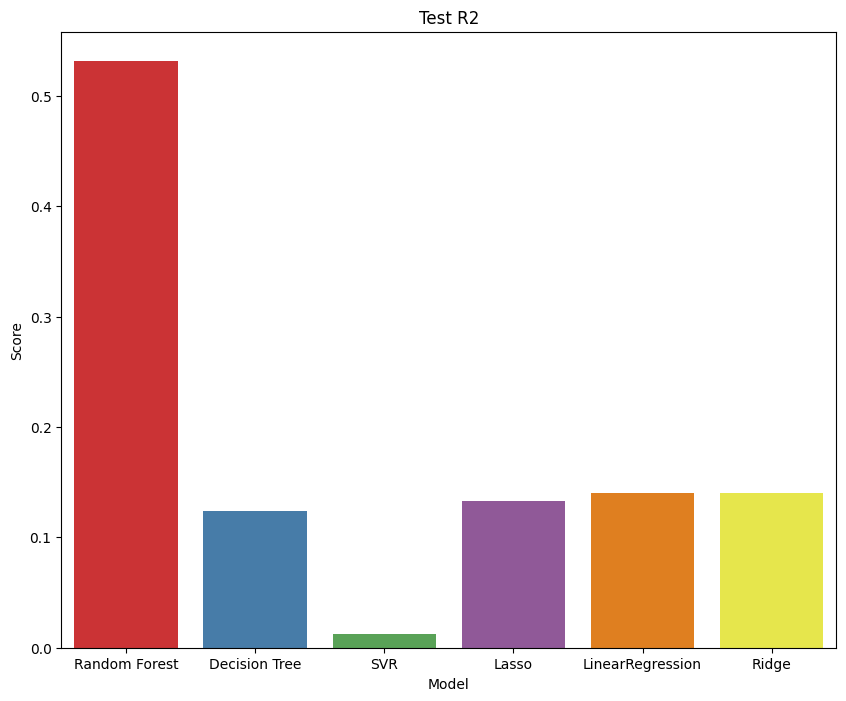

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Reset index to convert it into a column
report_df_reset = report_df.reset_index()

# Set the plot size
plt.figure(figsize=(10, 8))

# Plot Train R2
sns.barplot(data=report_df_reset, x='index', y='Train R2', palette='Set1')
plt.title('Train R2')
plt.xlabel('Model')
plt.ylabel('Score')

# Display the plot
plt.show()

# Set the plot size
plt.figure(figsize=(10, 8))

# Plot Test R2
sns.barplot(data=report_df_reset, x='index', y='Test R2', palette='Set1')
plt.title('Test R2')
plt.xlabel('Model')
plt.ylabel('Score')

# Display the plot
plt.show()





# Observations
from the above graph we saw that the Random Forest Regressor is performing well from other models on test and train data

So we choose Random forest regressor for hyper parameter tuning

# HyperParameter Tuning

In [ ]:

from sklearn.model_selection import GridSearchCV

# Create an instance of the Random Forest Regressor
reg = RandomForestRegressor()

# Define the hyperparameter grid and scoring metric
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15]
}

scoring = 'r2'  # Scoring metric for evaluation

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=reg, param_grid=param_grid, cv=5, n_jobs=-1, scoring=scoring, verbose=2)

# Fit the grid search to the training data
grid_search.fit(xtrain, ytrain)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10, 15],
                         'n_estimators': [100, 200, 300]},
             scoring='r2', verbose=2)

In [ ]:
best_model = grid_search.best_estimator_


In [ ]:
best_model

RandomForestRegressor(n_estimators=300)

In [ ]:
y_pred = best_model.predict(xtest)


In [ ]:
from sklearn.metrics import r2_score
y_pred = best_model.predict(xtest)
r2 = r2_score(ytest, y_pred)
print("R^2 score:", r2)


R^2 score: 0.5329841779071569


In [ ]:
rmse=sqrt(mean_squared_error(ytest,y_pred))



In [ ]:
print('rmse:',rmse)

rmse: 70.77311664904825


# Conclusion
The best Algorithm to use for this dataset Random Forest Regressor

The untuned model was able to explain 52% of variance on test set .

The tuned model was able to explain 53% of varaince on tese set which is improvement of 1%


